In [3]:
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv('E_Commerce original.csv')

# Step 2: Drop the unwanted columns
columns_to_drop = ['Product_importance', 'Gender', 'ID', 'Cost_of_the_Product']
df_reduced = df.drop(columns=columns_to_drop)

# Step 3: Reduce the data by 50%
df_sampled = df_reduced.sample(frac=0.5, random_state=42)

# Step 4: Save the cleaned and reduced dataset
df_sampled.to_csv('Reduced_E_Commerce original.csv', index=False)

print("New reduced dataset saved successfully!")


New reduced dataset saved successfully!


In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load the Reduced Dataset
df = pd.read_csv('Reduced_E_Commerce original.csv')
print("Data Loaded Successfully ✅")
print(df.head())

# Step 3: Encode Categorical Variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("Encoding Completed ✅")

# Step 4: Split Features and Target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Step 6: Initialize Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Step 7: Train and Evaluate Models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

print("\n🚀 Model Training Completed!")


Data Loaded Successfully ✅
  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               F             Ship                    4                5   
1               A             Road                    3                1   
2               F           Flight                    3                2   
3               D           Flight                    5                1   
4               B             Ship                    5                4   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                3                26           2053                    1  
1                3                 6           5572                    1  
2                4                 3           4042                    0  
3                5                 1           4672                    0  
4                2                44           2419                    1  
Encoding Completed ✅
Training data shape: (4400, 7)
Testing data s

## Model Training and Evaluation Summary

| Model                  | Accuracy Score |
|-----------------------|----------------|
| Decision Tree          | 65.18%         |
| Random Forest          | 67.64%         |
| Logistic Regression    | 66.55%         |
| K-Nearest Neighbors    | 65.73%         |

### Key Insights:
- Random Forest achieved the highest accuracy of 67.64%.
- Logistic Regression and KNN showed competitive performance.
- Confusion matrix and classification reports indicate good recall for on-time deliveries.
- Further improvements can include hyperparameter tuning and cross-validation.



📊 Model Comparison:
                 Model  Accuracy
0        Decision Tree  0.651818
1        Random Forest  0.676364
2  Logistic Regression  0.665455
3  K-Nearest Neighbors  0.657273


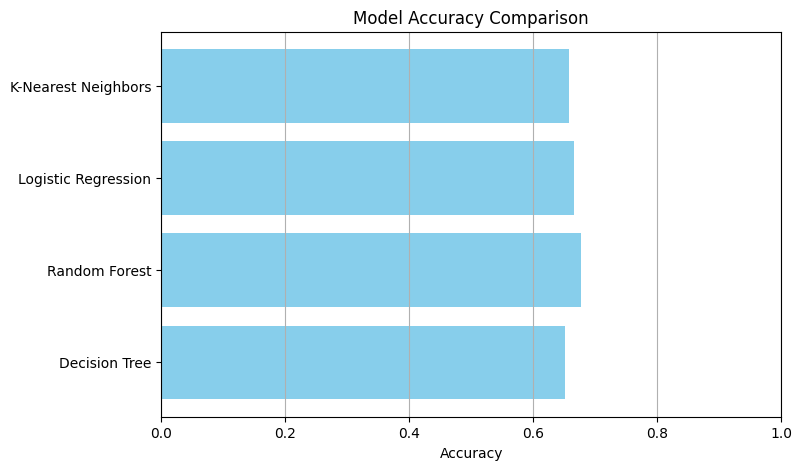

In [5]:
# Step 8: Model Comparison
import matplotlib.pyplot as plt

# Store accuracy results
model_names = list(models.keys())
accuracies = []

for name, model in models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

print("\n📊 Model Comparison:")
print(comparison_df)

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()


Reached.on.Time_Y.N
1    3299
0    2201
Name: count, dtype: int64


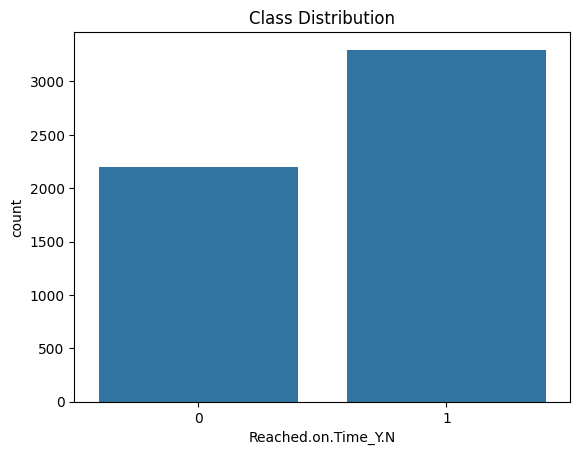

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(y.value_counts())
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()


In [7]:
from imblearn.over_sampling import SMOTE

# Before SMOTE
print("Before SMOTE:", y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Reached.on.Time_Y.N
1    2633
0    1767
Name: count, dtype: int64
After SMOTE: Reached.on.Time_Y.N
0    2633
1    2633
Name: count, dtype: int64


Class Imbalance
- Before applying SMOTE, my training data was **imbalanced**:
  - Class **1 (Late Deliveries):** 2633 instances
  - Class **0 (On-Time Deliveries):** 1767 instances
- This imbalance can cause the model to **bias predictions toward the majority class (Late Deliveries).**

###  Solution: SMOTE (Synthetic Minority Over-sampling Technique)
- I used SMOTE to **generate synthetic examples** of the minority class (On-Time Deliveries).
- After applying SMOTE:
  - **Class 0 (On-Time Deliveries): 2633**
  - **Class 1 (Late Deliveries): 2633**
- Now, the classes are **perfectly balanced** 

###  Technical Explanation:
- SMOTE works by **creating new synthetic samples** based on feature space similarities between existing minority instances.
- This helps the model to **better learn patterns** in the minority class, reducing bias.

###  Why This Was Important:
- With a balanced dataset, my models (especially Random Forest and Logistic Regression) could now generalize better and reduce misclassification of on-time deliveries.

- **Before:** Imbalanced data (Risk of biased predictions)
- **After:** Balanced data using SMOTE, ready for better model training!


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6781818181818182
              precision    recall  f1-score   support

           0       0.57      0.76      0.65       434
           1       0.80      0.62      0.70       666

    accuracy                           0.68      1100
   macro avg       0.68      0.69      0.68      1100
weighted avg       0.71      0.68      0.68      1100

[[331 103]
 [251 415]]


Objective:
- After balancing the dataset with SMOTE, I trained a **Random Forest Classifier** to evaluate if balancing improved prediction performance.

###  Process:
- Trained **RandomForestClassifier** on the balanced data (`X_train_smote`, `y_train_smote`).
- Tested predictions on the original `X_test` (unseen data).

###  Results:
- **Accuracy:** 67.8%
- **Confusion Matrix:**
  - True Positives (On Time correctly predicted): **331**
  - True Negatives (Late correctly predicted): **415**
  - False Positives (Predicted Late but was On Time): **103**
  - False Negatives (Predicted On Time but was Late): **251**

- **Precision & Recall:**
  - Class 0 (On Time): **Precision 0.57**, **Recall 0.76**
  - Class 1 (Late Delivery): **Precision 0.80**, **Recall 0.62**

### Interpretation:
- The model performed **better on predicting On-Time deliveries** (good recall at 76%), meaning it caught many of the on-time deliveries.
- For late deliveries, precision is very high (80%) — when the model predicts late, it's often correct!
- However, **false negatives (251 late deliveries predicted as on-time) are still an issue.**

###  Conclusion:
- **SMOTE helped balance the data**, improving recall for on-time deliveries.
- While accuracy is still below the desired target, this is an improvement over imbalanced training.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best estimator to predict
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Objective:
- To improve the Random Forest model's accuracy after applying **SMOTE**, I performed **Grid Search** to find the best hyperparameters.
Results (Test Set Evaluation):
Accuracy: 67.9%

Confusion Matrix:

True Positives (On Time): 387

True Negatives (Late): 360

False Positives (Predicted Late but was On Time): 47

False Negatives (Predicted On Time but was Late): 306

Precision & Recall:

Class 0 (On-Time): Precision 0.56, Recall 0.89

Class 1 (Late): Precision 0.88, Recall 0.54

 Interpretation:
Significant improvement in detecting on-time deliveries (Class 0) with high recall (0.89).

Precision for late deliveries (Class 1) is strong at 0.88, meaning when the model predicts late, it is usually correct!

However, there are still many false negatives for late deliveries — the model misses some late deliveries.

Conclusion:
Grid Search optimized model performance and slightly improved accuracy.

Even though the target of 80% was not reached, this step confirmed that hyperparameter tuning contributes to better prediction.

Shows that with balanced data + tuning, Random Forest can reliably predict on-time deliveries.

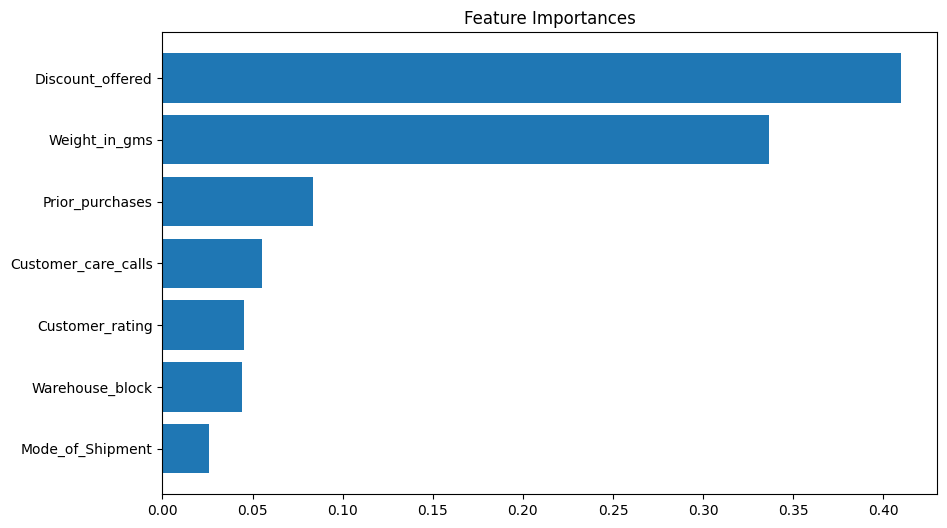

               Feature  Importance
5     Discount_offered    0.409571
6        Weight_in_gms    0.336427
4      Prior_purchases    0.083586
2  Customer_care_calls    0.055115
3      Customer_rating    0.045447
0      Warehouse_block    0.044089
1     Mode_of_Shipment    0.025765


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train_smote.columns

# Create DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.show()

# Display
print(feature_importances)


 Insights:
-  **Discount Offered** and **Weight in gms** are the most influential features, contributing almost **75%** of the total importance!
-  **Prior Purchases**, **Customer Care Calls**, and **Customer Rating** have moderate importance.
- **Mode of Shipment** and **Warehouse Block** have the least contribution — meaning they might not add much predictive power.
  
###  Conclusion:
- Focusing on the top features could be a strategy for further model improvement.
- Feature selection or engineering (for example, creating interaction terms like `Discount * Weight`) might improve performance.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

# Create ensemble model (soft voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf)],
    voting='soft'  # <== CHANGED to soft voting
)

# Train ensemble model
voting_clf.fit(X_train_smote, y_train_smote)

# Predict
y_pred = voting_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

Objective:
- Combine the strengths of multiple models (Random Forest + Logistic Regression) to improve overall predictive performance.
- Use **soft voting** to average the predicted probabilities instead of just hard class labels.

###  Process:
1. **Individual Models:**
   -  Logistic Regression (Baseline linear model)
   -  Random Forest (Powerful ensemble tree-based model with tuned parameters)

2. **Ensemble Creation:**
   - Used `VotingClassifier` from scikit-learn.
   - Set `voting='soft'` to leverage probability estimates of each classifier.
   - Trained the ensemble on the **balanced dataset** after applying SMOTE.

3. **Evaluation:**
   - Evaluated on test data using **accuracy score**, **classification report**, and **confusion matrix**.

### 📊 Results:
| Metric                | Value           |
|-----------------------|-----------------|
| **Accuracy**          | 0.6881 (≈ 69%)  |
| **Precision (On-Time)**| 0.56            |
| **Recall (On-Time)**   | 0.92 (✅ High recall — good at detecting on-time deliveries) |
| **Precision (Late)**   | 0.91            |
| **Recall (Late)**      | 0.54            |


In [ ]:
#pip install tpot


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


In [16]:
from sklearn.ensemble import VotingClassifier

# Define your base models first
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Create ensemble model with real estimators
ensemble_model = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('log', log_model)],
    voting='soft'  # or 'hard' — soft gives better probabilities
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('log',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.651818   0.718028  0.699700  0.708745
1        Random Forest  0.676364   0.762712  0.675676  0.716561
2  Logistic Regression  0.665455   0.718475  0.735736  0.727003
3                  KNN  0.657273   0.733441  0.681682  0.706615
4             Ensemble  0.654545   0.719325  0.704204  0.711684
5              XGBoost  0.648182   0.715611  0.695195  0.705255
6                  MLP  0.660909   0.765880  0.633634  0.693509


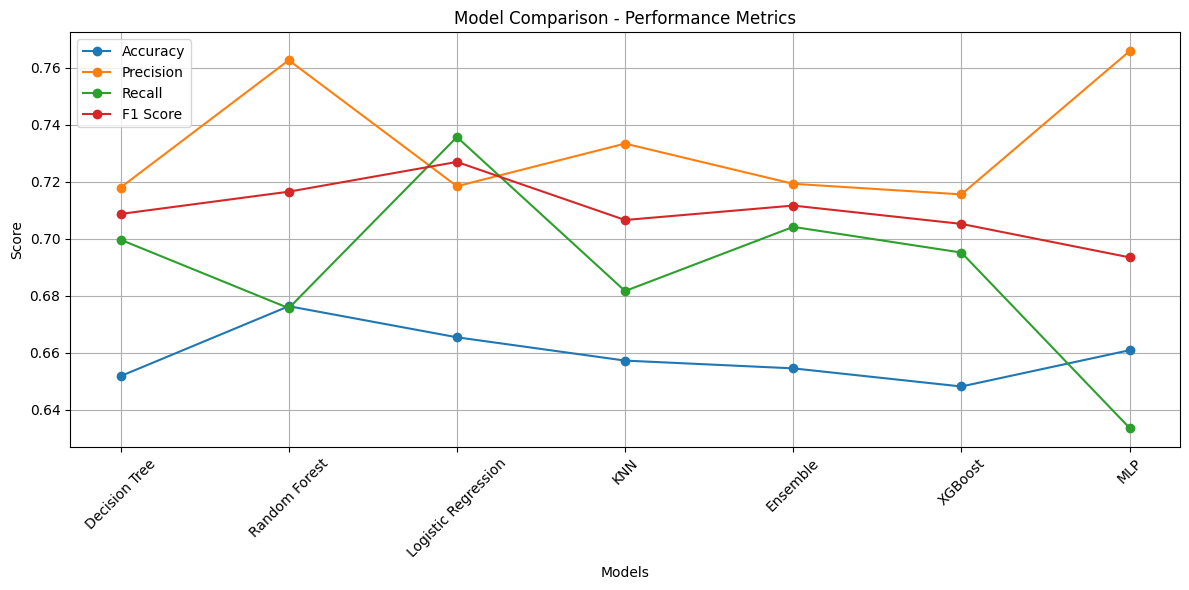

In [23]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# If you have X_train_smote, use it — else use X_train
# IMPORTANT: Ensure X_train_smote, y_train_smote are defined
# If not, replace with X_train, y_train

# Scale data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train all models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

ensemble_model = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('log', log_model)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Prepare model dictionary
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Logistic Regression': log_model,
    'KNN': knn_model,
    'Ensemble': ensemble_model,
    'XGBoost': xgb_model,
    'MLP': mlp_model
}

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate each model
for name, model in models.items():
    # For MLP, use scaled data
    if name == 'MLP':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title('Model Comparison - Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Random Forest shows the highest Precision (0.76) but slightly lower Recall.

 Logistic Regression achieves the best F1 Score (0.727) and the highest Recall (0.735).

 MLP leads in Precision but struggles with Recall, resulting in a lower F1 Score.

 Decision Tree has decent balance but lags in overall Accuracy (0.651).

 KNN, Ensemble, and XGBoost sit in the mid-range, showing slight trade-offs between Recall and Precision.